<a href="https://colab.research.google.com/github/Pierce-G7/IS_4487_Tokyo/blob/main/Pierce_day5_lab_megatelco_eda(II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 5 Lab, IS 4487

This lab (like the last one) is designed  to prepare you to complete the project assignment for today. We will go through code (using MegaTelCo as an example) that you will be able to adapt for the AdviseInvest project. Here is what you need to be able to do for the project assignment:

1. Create a plot showing the relationship between a numeric (or count) and a categorical variable.
2. Create a plot showing the relationship between two  categorical variables.


## Load Libraries


In [2]:
import pandas as pd
import sklearn as sk
import matplotlib as mpt


## Import Data


In [3]:
mtc = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/dd870389117d5b24eee7417d5378d80496555130/Labs/DataSets/megatelco_leave_survey.csv")

In [4]:
mtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      5000 non-null   object 
 1   income                       5000 non-null   int64  
 2   overage                      5000 non-null   int64  
 3   leftover                     5000 non-null   int64  
 4   house                        5000 non-null   int64  
 5   handset_price                5000 non-null   int64  
 6   over_15mins_calls_per_month  4997 non-null   float64
 7   average_call_duration        5000 non-null   int64  
 8   reported_satisfaction        5000 non-null   object 
 9   reported_usage_level         5000 non-null   object 
 10  considering_change_of_plan   5000 non-null   object 
 11  leave                        5000 non-null   object 
 12  id                           5000 non-null   int64  
dtypes: float64(1), int

# Prepare Data

1. Perform the cleaning from the previous lab:
   - Remove negative values of `income` and `house`
   - Remove absurdly large value of `handset_price`
   - Remove NAs
   - Make character variables into categorical (AKA factor) variables, including `college` which we will use for to demo the plots. (`college` is coded `one`/`zero`, which is weird, but we'll leave it as is.)



In [5]:
# filter rows
mtc_clean = mtc[(mtc['house'] > 0) & (mtc['income'] > 0) & (mtc['handset_price'] < 1000)]


In [6]:
# remove NAs
mtc_clean = mtc_clean.dropna()

In [7]:
# Convert string to categorical variables (including college)
mtc_clean['reported_satisfaction'] = mtc_clean['reported_satisfaction'].astype('category')
mtc_clean['reported_usage_level'] = mtc_clean['reported_usage_level'].astype('category')
mtc_clean['considering_change_of_plan'] = mtc_clean['considering_change_of_plan'].astype('category')
mtc_clean['college'] = mtc_clean['college'].astype('category')
mtc_clean['leave'] = mtc_clean['leave'].astype('category')


In [8]:
# check that it worked
mtc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4994 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      4994 non-null   category
 1   income                       4994 non-null   int64   
 2   overage                      4994 non-null   int64   
 3   leftover                     4994 non-null   int64   
 4   house                        4994 non-null   int64   
 5   handset_price                4994 non-null   int64   
 6   over_15mins_calls_per_month  4994 non-null   float64 
 7   average_call_duration        4994 non-null   int64   
 8   reported_satisfaction        4994 non-null   category
 9   reported_usage_level         4994 non-null   category
 10  considering_change_of_plan   4994 non-null   category
 11  leave                        4994 non-null   category
 12  id                           4994 non-null   int64   
dtypes: categ

Note that there are now no NAs; 6 rows have been removed.

In the project you will be directed to change a 0/1 variable into a categorical variable (with labels).  This change will often make plots more legible.  Here is how to do that with pandas, using `college` as an example:

In [9]:
mtc_clean["college"] = mtc_clean["college"].replace({1: "yes", 0: "no"})
mtc_clean["college"] = mtc_clean["college"].astype("category")

Explanation of code:

- `replace()`: Replaces specified values in a Series or DataFrame. The syntax is: `Series.replace(to_replace, value)`.  In this case `replace({1: "yes", 0: "no"})`  replaces 1 with "yes" and 0 with "no".
- `astype()`: Casts a pandas object to a specified dtype. In this casde, `astype("category")` converts the Series to categorical data type.

# Plotting

## 1. Plot the relationship between a numeric and a categorical variable

What, for example, would be the appropriate plot type for showing the relationship between `leave`--our target variable--and `income`? In this case, `leave` is a categorical variable, while `income` is numeric.

- A histogram won't work because it shows the distribution (the frequencies of values) for just a single variable.
- A scatterplot? No.  This will show the relationship between two *numeric* variables.
- A line plot?  This is usually reserved for data that has a time dimension.  
- A barplot?  This could work.  A summary statistic--mean, median, count, max, min--would be shown on the y-axis, with the categories on the x-axis.

<Axes: xlabel='leave'>

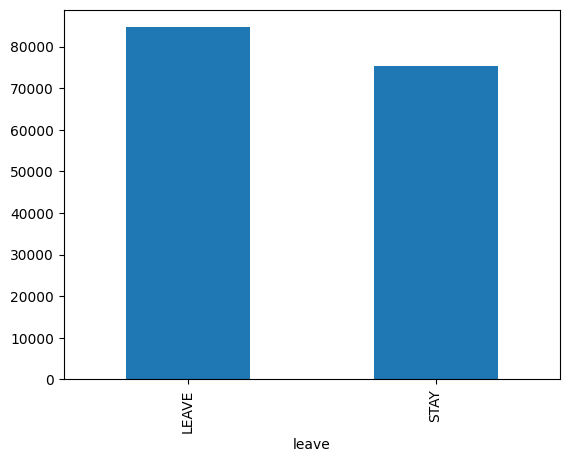

In [10]:
# barplot of mean income vs leave using pandas
mtc_clean.groupby('leave')['income'].mean().plot(kind='bar')


## Your Turn:  Choose a different summary statistic and add a title

- Update the plot so the bar heights show the median
- Add an appropriate title


<Axes: title={'center': 'Median income between leaving/staying'}, xlabel='leave', ylabel='median income'>

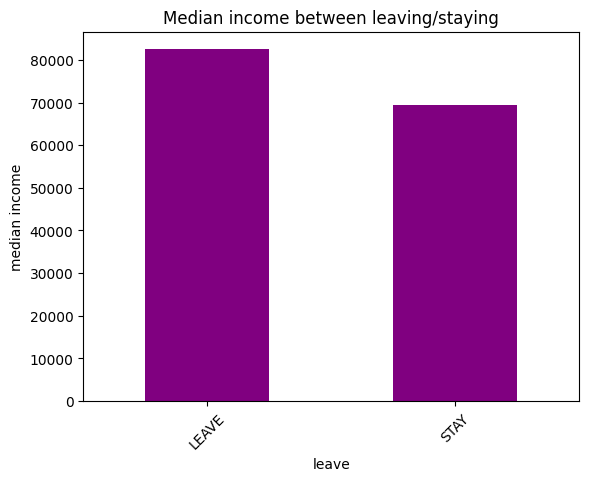

In [19]:
# Write your code here
mtc_clean.groupby('leave')['income'].median().plot(kind='bar',
                                                   title = 'Median income between leaving/staying',
                                                   ylabel = 'median income',
                                                   rot = 45,
                                                   color = 'purple')

What doesn't work very well about this barplot? The information is limited; it does not show the *range* of values. The height of the bar is determined by the summary statistic we've chosen, but gives no information about the *distribution* of observations.

For that, we need a *boxplot*:



income    Axes(0.125,0.11;0.775x0.77)
dtype: object

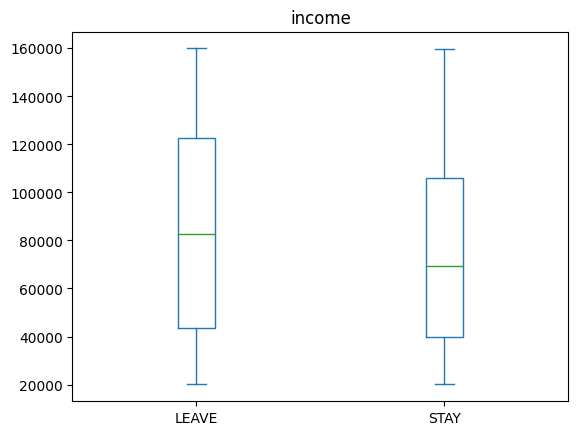

In [20]:
mtc_clean.plot(kind='box', column = "income", by = "leave")

Explanation of code:

- `mtc_clean`: the DataFrame we're working with.
- `.plot()`: the pandas method for creating plots directly from DataFrames.
- `kind = 'box'`: specifies that we want to create a box plot.
- `column = "income"`: tells the function which column to use for the y-axis of the plot.
- `by = "leave"`: specifies the column to use for grouping the data on the x-axis.


## Your Turn:  Fine tune the boxplot

- Add an appropriate title
- Add appropriate axis labels

income    Axes(0.125,0.11;0.775x0.77)
dtype: object

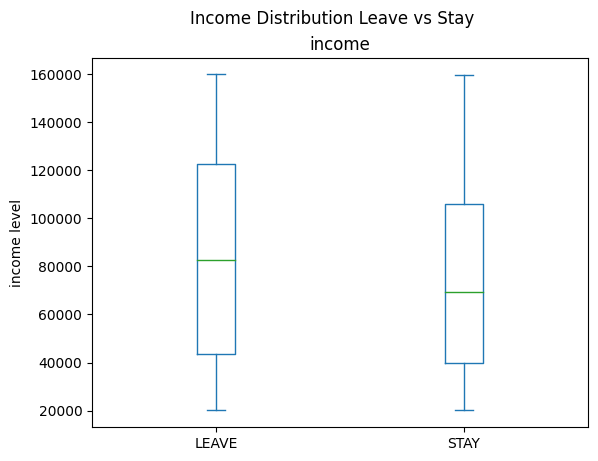

In [29]:
# your code goes here
mtc_clean.plot(kind='box',
               column = "income",
               by = "leave",
              title = 'Income Distribution Leave vs Stay',
               ylabel = 'income level'
               )

Now we can see from the box (which represents the middle 50% of the observation, or the central tendency of the data) that customers who stay tend to have lower incomes than customers who leave. In general, because box plots provide information about the distribution of the underlying data, they are often used to show the relationship between a categorical variable like `leave` and a numeric variable like `income`.

## 2. Plot the relationship between two categorical variables

This is tricky.  Will a boxplot work to show the relationship between, for example, `college` and `leave`?  No. For a boxplot, one of the variables needs to be numeric.


In [38]:
# boxplot of leave vs college using pandas
#mtc_clean['leave'] = mtc_clean['leave'].astype('category')
#mtc_clean['college'] = mtc_clean['college'].astype('category')

#mtc_clean.plot(kind = box", column='college', by='leave')

(mtc_clean.groupby(['college', 'leave'])['leave'].count().unstack())

leave,LEAVE,STAY
college,,
one,1285,1212
zero,1183,1314



The best option in this case is a barplot, but some preparatory work is required.

1. Calculate counts of college goers at each level of leave.
2. the height of the bars will represent those counts.

Here is an example.

In [43]:
# calculate counts
mtc_clean.groupby(['college', 'leave'])['leave'].count().unstack()

#mtc_clean.plot.bar(x = "college", y = "leave")

leave,LEAVE,STAY
college,,
one,1285,1212
zero,1183,1314


Explanation of code:

- `mtc_clean`: the DataFrame we're working with.
- `.groupby(['leave', 'college'])`: groups the DataFrame by two columns: `leave` and `college`, creating a GroupBy object where each group is a unique combination of `leave` and `college` values.
- `['college']`: selects the `college` column from the grouped data.
- `.count()`: counts the number of non-null values in each group. In this case, it's effectively counting the number of rows in each group.
- `.unstack()`:  makes the resulting Series into a DataFrame.

Now, the barplot will use this table:



<Axes: xlabel='college'>

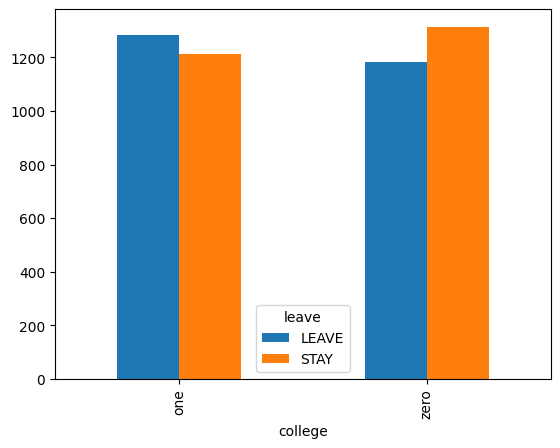

In [44]:
mtc_clean.groupby(['college', 'leave'])['leave'].count().unstack().plot(kind='bar')

This plot compares churn rates between college-educated and non-college-educated customers, showing how leaving vs staying changes with education level. In other words, it shows the *impact* of education on churn.

In this case the impact is relatively negligible.

This interpretation will be clearer if we make the y-axis into a *proportion* rather than a *count*.

In [45]:
# Calculate proportions
(mtc_clean.groupby(['college', 'leave'])['leave'].count().unstack()
             .apply(lambda x: x / x.sum(), axis=1))



leave,LEAVE,STAY
college,,
one,0.514618,0.485382
zero,0.473769,0.526231


Explanation of new code:

- `.apply(lambda x: x / x.sum(), axis=1)`:
   - `apply()`: Applies a function to each row of the DataFrame.
   - `lambda x: x / x.sum()`: An anonymous function that divides each value by the row sum.
   - `axis=1`: Specifies that the function should be applied row-wise.

We can now use this table with proportions in the bar plot.

In [ ]:
# Make the plot

(mtc_clean.groupby(['college', 'leave'])['leave'].count().unstack()
             .apply(lambda x: x / x.sum(), axis=1)).plot(kind='bar')

This plot shows that leaving and staying is about 50% for college and non-college customers.

## Your Turn:  Fine-tune the plot

1. Add a title
2. Add an appropriate y-axis label.

<Axes: title={'center': 'percentage difference leaving vs staying, college educated vs no college'}, xlabel='college', ylabel='percentage'>

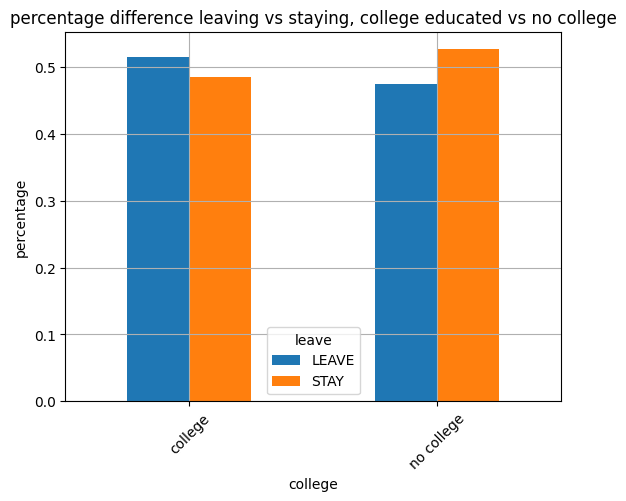

In [55]:
# Write your code here

mtc_clean["college"] = mtc_clean["college"].replace({"one": "college", "zero": "no college"})


(mtc_clean.groupby(['college', 'leave'])['leave'].count().unstack()
             .apply(lambda x: x / x.sum(), axis=1)).plot(kind='bar',
                                                         title = 'percentage difference leaving vs staying, college educated vs no college',
                                                         ylabel= "percentage",
                                                         grid = 'True',
                                                         rot = 45
                                                         )

# Functions:

- `pd.read_csv()`: Reads a CSV file into a pandas DataFrame.
- `.info()`: Prints a concise summary of a DataFrame, including column names, non-null counts, and data types.
- `.dropna()`: Removes rows with missing values from a DataFrame.
- `.astype()`: Casts a pandas object to a specified dtype.
- `.groupby()`: Groups DataFrame using a mapper or by a Series of columns.
- `.mean()`: Returns the mean of the values for the requested axis.
- `.plot()`: Creates a plot of the data in a DataFrame or Series.
- `.median()`: Returns the median of the values for the requested axis.
- `.count()`: Counts non-null values in a Series or DataFrame.
- `.unstack()`: Pivots a level of the index labels.
- `.apply()`: Applies a function along an axis of the DataFrame.
- `lambda`: Creates an anonymous function.
- `sum()`: Returns the sum of a Series or DataFrame elements.